# Missing Data Pattern Visualization Example

This notebook demonstrates the missing data pattern visualization for both synthetic data and the NHANES dataset.

In [1]:
import pandas as pd
import numpy as np
from utils import md_pattern_like, plot_missing_data_pattern

## 1. Synthetic Data Example

First, let's generate synthetic data with different types of missingness and visualize their patterns.

In [2]:
def generate_synthetic_missingness_data(n=500, p=5, seed=42):
    """
    Generate synthetic data with MCAR, MAR, and MNAR missingness.
    """
    np.random.seed(seed)

    # 1. Generate full data
    data = np.random.normal(0, 1, size=(n, p))
    columns = [f"var{i+1}" for i in range(p)]
    df_full = pd.DataFrame(data, columns=columns)

    # Initialize copies
    df_mcar = df_full.copy()
    df_mar = df_full.copy()
    df_mnar = df_full.copy()

    # 2. MCAR: 15% of values missing randomly across all cells
    mcar_mask = np.random.rand(n, p) < 0.15
    df_mcar[mcar_mask] = np.nan

    # 3. MAR: missingness in each column depends on another column
    for i in range(p):
        ref_col = df_full.columns[(i + 1) % p]  # wrap around
        prob = (df_full[ref_col] - df_full[ref_col].min()) / (df_full[ref_col].max() - df_full[ref_col].min())
        prob = prob.clip(0, 1)
        mask = np.random.rand(n) < prob * 0.3
        df_mar.loc[mask, df_full.columns[i]] = np.nan

    # 4. MNAR: missingness in each column depends on its own value
    for col in df_full.columns:
        prob = (df_full[col] - df_full[col].min()) / (df_full[col].max() - df_full[col].min())
        prob = prob.clip(0, 1)
        mask = np.random.rand(n) < prob * 0.3
        df_mnar.loc[mask, col] = np.nan

    return {
        "full": df_full,
        "mcar": df_mcar,
        "mar": df_mar,
        "mnar": df_mnar
    }

MCAR (Missing Completely At Random) Pattern:


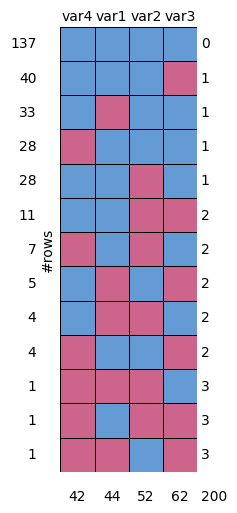


MAR (Missing At Random) Pattern:


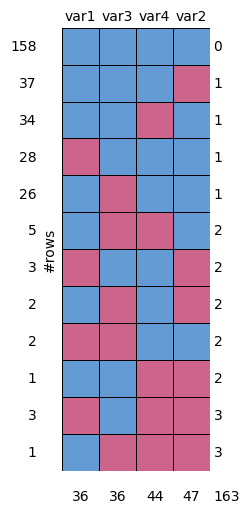


MNAR (Missing Not At Random) Pattern:


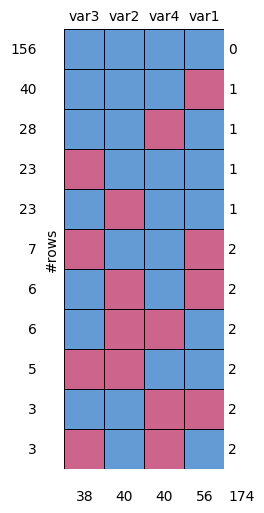

,var3,var2,var4,var1,#miss_row
#rows,,,,,
156,1,1,1,1,0
40,1,1,1,0,1
28,1,1,0,1,1
23,0,1,1,1,1
23,1,0,1,1,1
7,0,1,1,0,2
6,1,0,1,0,2
6,1,0,0,1,2
5,0,0,1,1,2


In [3]:
# Generate synthetic data
data_dict = generate_synthetic_missingness_data(n=300, p=4)

# Visualize MCAR pattern
print("MCAR (Missing Completely At Random) Pattern:")
pattern_mcar = md_pattern_like(data_dict["mcar"])
plot_missing_data_pattern(pattern_mcar, title="MCAR Missing Pattern")

# Visualize MAR pattern
print("\nMAR (Missing At Random) Pattern:")
pattern_mar = md_pattern_like(data_dict["mar"])
plot_missing_data_pattern(pattern_mar, title="MAR Missing Pattern")

# Visualize MNAR pattern
print("\nMNAR (Missing Not At Random) Pattern:")
pattern_mnar = md_pattern_like(data_dict["mnar"])
plot_missing_data_pattern(pattern_mnar, title="MNAR Missing Pattern")

## 2. NHANES Dataset Example

Now, let's visualize the missing data pattern in the NHANES dataset.

NHANES Dataset Missing Pattern:


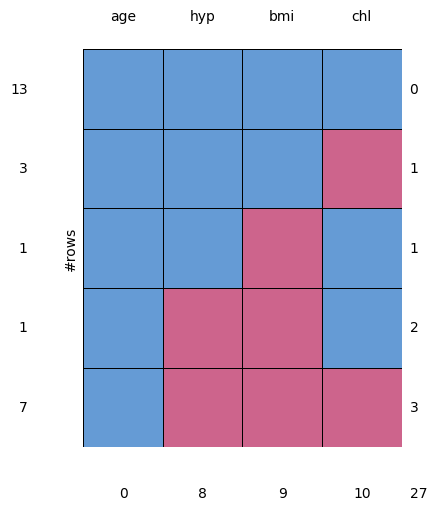

,age,hyp,bmi,chl,#miss_row
#rows,,,,,
13,1,1,1,1,0
3,1,1,1,0,1
1,1,1,0,1,1
1,1,0,0,1,2
7,1,0,0,0,3
#miss_col,0,8,9,10,27


In [4]:
# Load NHANES data
nhanes_data = pd.read_csv("../data/nhanes.csv")

# Visualize missing pattern
print("NHANES Dataset Missing Pattern:")
pattern_nhanes = md_pattern_like(nhanes_data)
plot_missing_data_pattern(pattern_nhanes, title="NHANES Missing Pattern")

NHANES2 Dataset Missing Pattern (should be the same as NHANES):


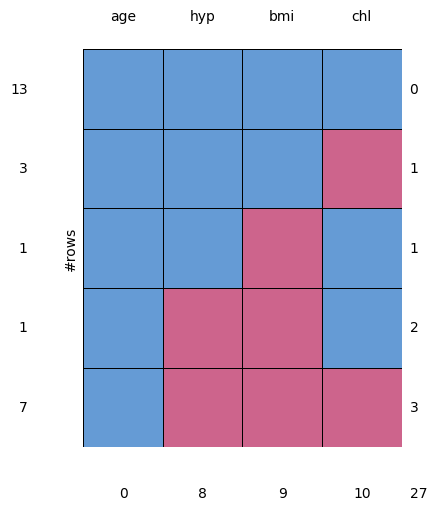

,age,hyp,bmi,chl,#miss_row
#rows,,,,,
13,1,1,1,1,0
3,1,1,1,0,1
1,1,1,0,1,1
1,1,0,0,1,2
7,1,0,0,0,3
#miss_col,0,8,9,10,27


In [5]:
# Load NHANES2 data
nhanes2_data = pd.read_csv("../data/nhanes2.csv")

# Visualize missing pattern
print("NHANES2 Dataset Missing Pattern (should be the same as NHANES):")
pattern_nhanes2 = md_pattern_like(nhanes2_data)
plot_missing_data_pattern(pattern_nhanes2, title="NHANES2 Missing Pattern")